In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
haberman_data=pd.read_csv('datasets_474_966_haberman.csv',names=[0,1,2,3])

In [3]:
haberman_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
columns=['age', 'op_yr', 'ax', 'status'] 
haberman_data.columns=columns
haberman_data.head()

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
haberman_data.shape

(306, 4)

In [6]:
haberman_data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
Survived= haberman_data['status'].value_counts()[1]
Not_Survived= haberman_data['status'].value_counts()[2]


In [8]:
total_survived= Survived+Not_Survived
survived=(Survived/total_survived)*100
not_survived=(Not_Survived/total_survived)*100

In [9]:
print('The percentage of patient that survived the surgery' , round( survived, 2), '%')
print('The percentage of patient that survived the surgery' , round(not_survived, 2), '%')

The percentage of patient that survived the surgery 73.53 %
The percentage of patient that survived the surgery 26.47 %


It can be obeserved that there are 2 classes in status, those that survived and those that did not survive

It can be observed that more patients survived the surgery

It can also be the very high percentage of those who survived can cause class imbalance

In [10]:
haberman_data.describe()

,age,op_yr,ax,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


There is no missing value, from count

Most patients were im their 60's when operated on, from the average age

Some patients axil nodes were not detected, minimum num of ax being 0

Text(0.5, 0, 'Ages of Patients')

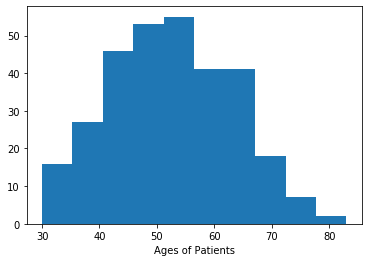

In [11]:
plt.hist(haberman_data['age'])
plt.xlabel('Ages of Patients')

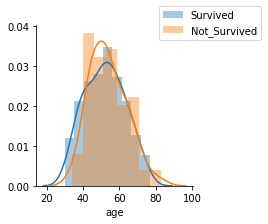

In [12]:
grid=sns.FacetGrid(haberman_data, hue='status')
grid.map(sns.distplot, 'age' )
plt.legend(['Survived', 'Not_Survived'], bbox_to_anchor=(0.75,1.15))

It can be observed that most patients 70 years didnt survive

Text(0.5, 0, 'Year of Operation')

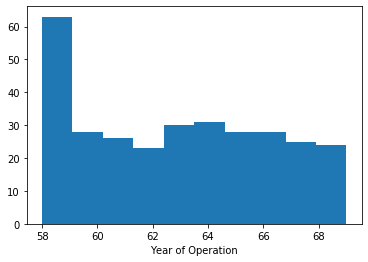

In [13]:
plt.hist(haberman_data['op_yr'])
plt.xlabel('Year of Operation')

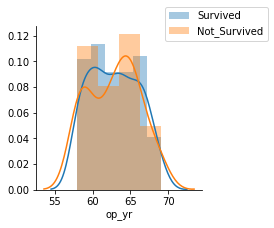

In [14]:
grid=sns.FacetGrid(haberman_data, hue='status')
grid.map(sns.distplot, 'op_yr' )
plt.legend(['Survived', 'Not_Survived'], bbox_to_anchor=(0.75,1.15))

A high percentage of people operated on at age 65 didnt survive

Text(0.5, 0, 'Axil Nodes')

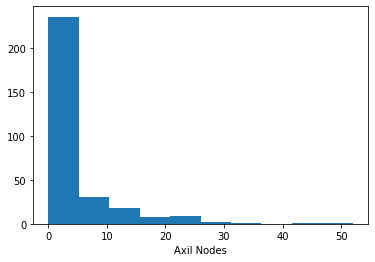

In [15]:
plt.hist(haberman_data['ax'])
plt.xlabel('Axil Nodes')

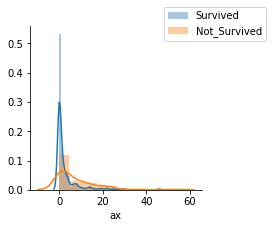

In [16]:
grid=sns.FacetGrid(haberman_data, hue='status')
grid.map(sns.distplot, 'ax' )
plt.legend(['Survived', 'Not_Survived'], bbox_to_anchor=(0.75,1.15))

A lot of patients with no axil node detected survived

In [17]:
haberman_data_Survived=haberman_data.loc[haberman_data["status"]==1]
haberman_data_Not_Survived=haberman_data.loc[haberman_data["status"]== 2]

In [18]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['age'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [19]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['age'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [20]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [21]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

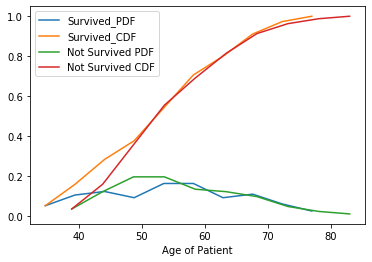

In [22]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The Survival chances are high for the patients having age less than 40 years.

In [23]:
density_op_yr_survived,bin_edges_op_yr_survived=np.histogram(
    haberman_data_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_yr_survived=(density_op_yr_survived)/(sum(density_op_yr_survived))

In [24]:
density_op_yr_Not_Survived,bin_Edges_op_yr_Not_Survived=np.histogram(
    haberman_data_Not_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_yr_Not_Survived=(density_op_yr_Not_Survived)/(sum(density_op_yr_Not_Survived))

In [25]:
print("Bin Edges Survived : {}\n".format(bin_edges_op_yr_survived))
print("PDF Survived : {}\n".format(pdf_op_yr_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_op_yr_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_op_yr_Not_Survived))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



In [26]:
cdf_op_yr_Not_Survived=np.cumsum(pdf_op_yr_Not_Survived)
cdf_op_yr_survived=np.cumsum(pdf_op_yr_survived)

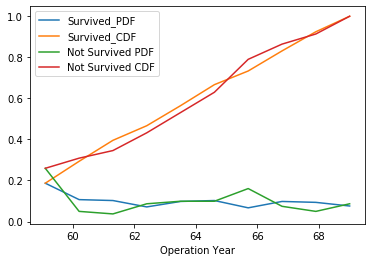

In [27]:
plt.plot(bin_edges_op_yr_survived[1:],pdf_op_yr_survived)
plt.plot(bin_edges_op_yr_survived[1:],cdf_op_yr_survived)
plt.plot(bin_Edges_op_yr_Not_Survived[1:],pdf_op_yr_Not_Survived)
plt.plot(bin_Edges_op_yr_Not_Survived[1:],cdf_op_yr_Not_Survived)
plt.xlabel('Operation Year')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The Survival chances is low for the patients having age less than 68 years.

In [28]:
density_ax_survived,bin_edges_ax_survived=np.histogram(
    haberman_data_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_survived=(density_ax_survived)/(sum(density_ax_survived))

In [29]:
density_ax_Not_Survived,bin_Edges_ax_Not_Survived=np.histogram(
    haberman_data_Not_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_Not_Survived=(density_ax_Not_Survived)/(sum(density_ax_Not_Survived))

In [30]:
print("Bin Edges Survived : {}\n".format(bin_edges_ax_survived))
print("PDF Survived : {}\n".format(pdf_ax_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_ax_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_ax_Not_Survived))

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



In [31]:
cdf_ax_Not_Survived=np.cumsum(pdf_ax_Not_Survived)
cdf_ax_survived=np.cumsum(pdf_ax_survived)

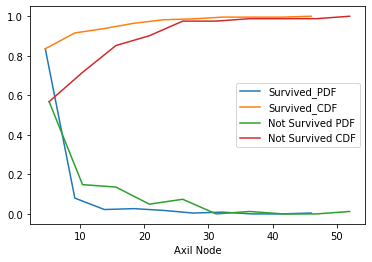

In [32]:
plt.plot(bin_edges_ax_survived[1:],pdf_ax_survived)
plt.plot(bin_edges_ax_survived[1:],cdf_ax_survived)
plt.plot(bin_Edges_ax_Not_Survived[1:],pdf_ax_Not_Survived)
plt.plot(bin_Edges_ax_Not_Survived[1:],cdf_ax_Not_Survived)
plt.xlabel('Axil Node')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).


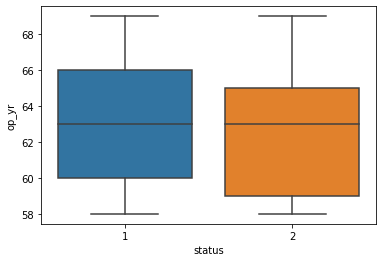

In [33]:
sns.boxplot(x='status', y='op_yr', data= haberman_data)

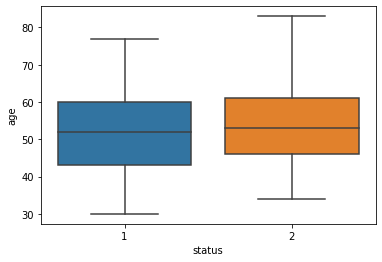

In [34]:
sns.boxplot(x='status', y='age', data= haberman_data)

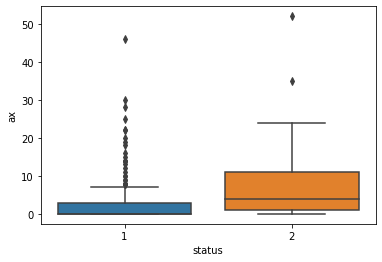

In [35]:
sns.boxplot(x='status', y='ax', data= haberman_data)

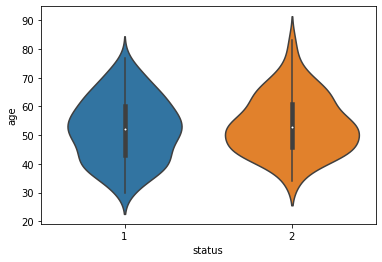

In [36]:
sns.violinplot(x='status', y='age', data= haberman_data)

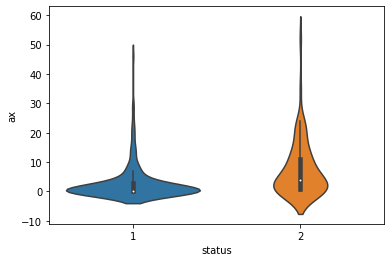

In [37]:
sns.violinplot(x='status', y='ax', data= haberman_data)

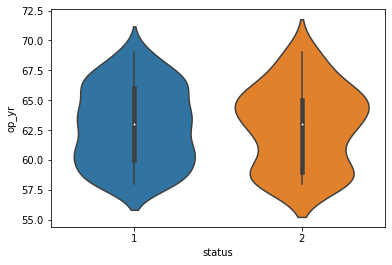

In [38]:
sns.violinplot(x='status', y='op_yr', data= haberman_data)

In [39]:
data=haberman_data.drop('status', axis=1)

C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


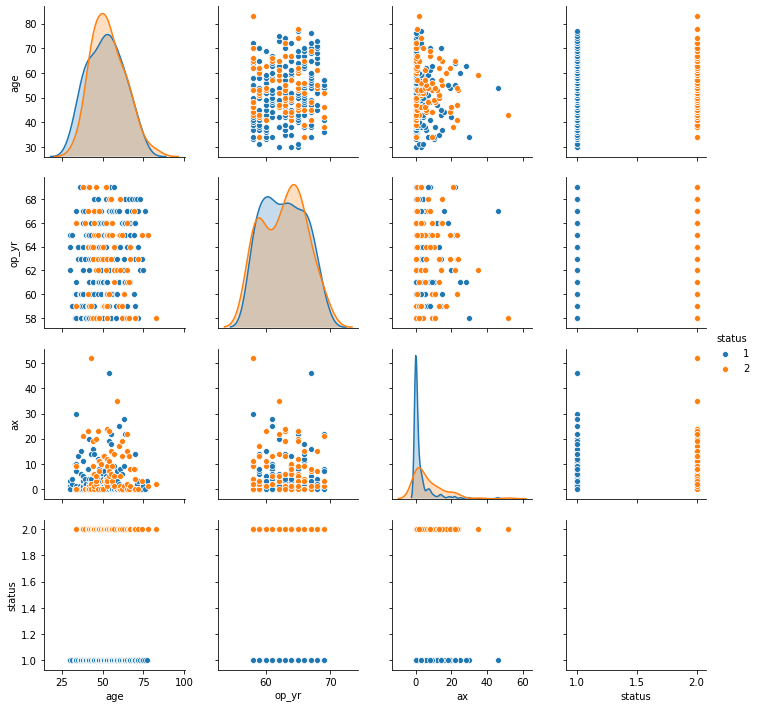

In [40]:
sns.pairplot(haberman_data, hue='status',)

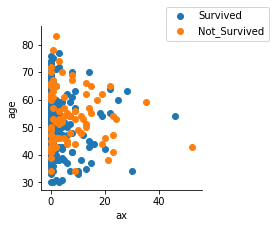

In [41]:
grid=sns.FacetGrid(haberman_data, hue='status')
grid.map(plt.scatter, 'ax','age' )
plt.legend(['Survived', 'Not_Survived'], bbox_to_anchor=(0.75,1.15))

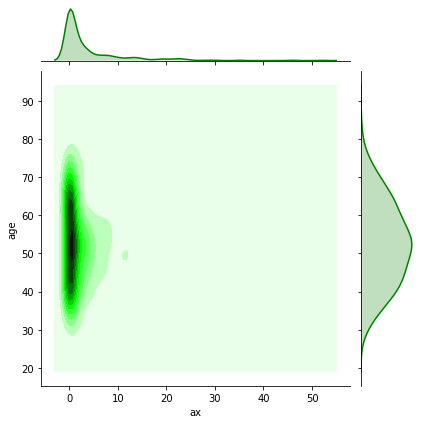

In [42]:
sns.jointplot(x='ax', y='age', data=haberman_data, kind='kde', color='green')

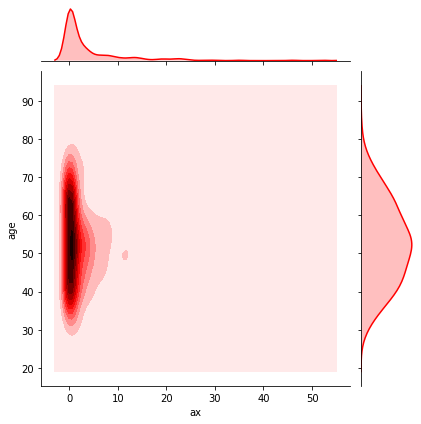

In [43]:
sns.jointplot(x='ax', y='age', data=haberman_data, kind='kde',color='red')